In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Downloads/breast cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df2 = df[df.columns[:-1]]
df2.shape

(569, 32)

In [5]:
def remove_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

df3 = df2.iloc[:, 2:].apply(remove_outliers_iqr)


df3 = pd.concat([df2.iloc[:, :2], df3], axis=1)

In [8]:
df3.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,555.000000,562.000000,556.000000,544.000000,563.000000,553.000000,551.000000,559.000000,554.000000,...,552.000000,564.000000,554.000000,534.000000,562.000000,553.000000,557.000000,569.000000,546.000000,545.000000
mean,3.037183e+07,13.865223,19.117847,90.235576,608.214890,0.096002,0.099594,0.080551,0.046656,0.179200,...,15.836611,25.497465,104.522256,778.653184,0.131698,0.238973,0.257621,0.114606,0.282075,0.081596
std,1.250206e+08,3.137897,4.028416,21.646564,273.550172,0.013196,0.045174,0.065944,0.035167,0.024035,...,4.200986,5.863650,29.459897,397.993175,0.021493,0.129451,0.184242,0.065732,0.047575,0.013950
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.665000,16.162500,74.832500,412.675000,0.086210,0.063730,0.028680,0.020220,0.161825,...,12.977500,21.052500,83.862500,507.425000,0.116600,0.144000,0.111700,0.064930,0.248050,0.070970
50%,9.060240e+05,13.240000,18.785000,85.815000,537.300000,0.095790,0.090090,0.058920,0.032790,0.178300,...,14.835000,25.305000,96.925000,655.150000,0.131200,0.208900,0.222000,0.099930,0.279750,0.079190
75%,8.813129e+06,15.495000,21.660000,102.625000,717.550000,0.105000,0.128300,0.118950,0.069300,0.194575,...,18.002500,29.437500,121.925000,930.750000,0.145275,0.317200,0.375900,0.161400,0.312125,0.090260
max,9.113205e+08,21.750000,29.970000,147.300000,1326.000000,0.133500,0.228400,0.281000,0.152000,0.245900,...,27.320000,41.850000,186.800000,1933.000000,0.188300,0.624700,0.772700,0.291000,0.415400,0.122400


In [21]:
df3.isnull().sum()
df4 = df3.dropna()


In [22]:
df4.shape

(398, 32)

In [31]:
X = df4.iloc[: ,2:]
Y = df4.iloc[: ,1:2]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)


In [32]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Hassa\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hassa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predict = model.predict(X_test)

In [35]:
score = accuracy_score(Y_test,predict)
score

0.9625

In [37]:
CF = confusion_matrix(Y_test,predict)
CF

array([[53,  1],
       [ 2, 24]], dtype=int64)

In [40]:
matrix = classification_report(Y_test,predict)
print("Classification report: \n",matrix)

Classification report: 
               precision    recall  f1-score   support

           B       0.96      0.98      0.97        54
           M       0.96      0.92      0.94        26

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [41]:
df4.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,845636,M,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,84610002,M,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,846381,M,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


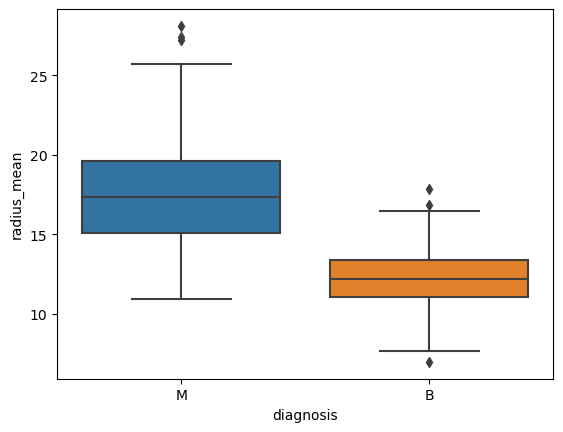

In [43]:
sns.boxplot(x = df["diagnosis"], y = df["radius_mean"])
plt.show()

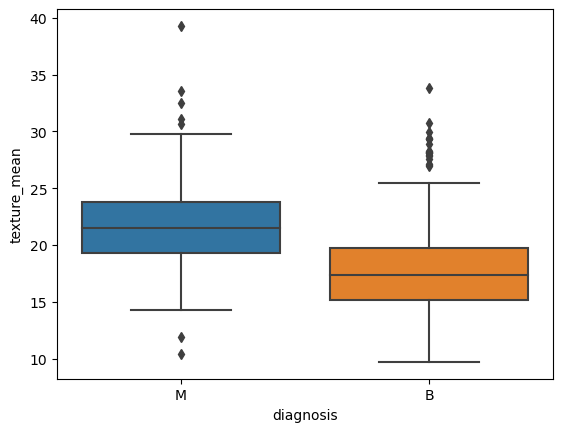

In [44]:
sns.boxplot(x = df["diagnosis"], y = df["texture_mean"])
plt.show()

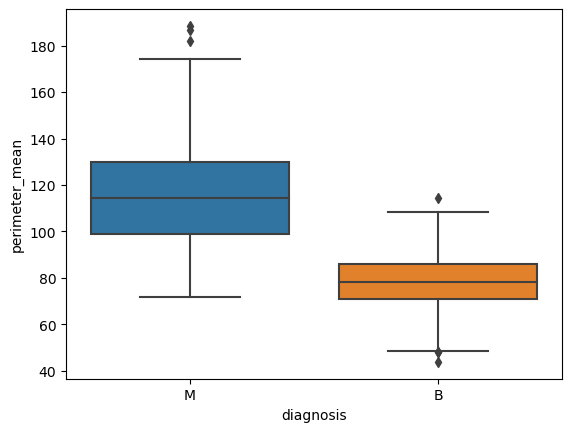

In [57]:
sns.boxplot(x = df["diagnosis"], y = df["perimeter_mean"])
plt.show()

In [ ]:
sns.boxplot(x = df["diagnosis"], y = df["perimeter_mean"])
plt.show()

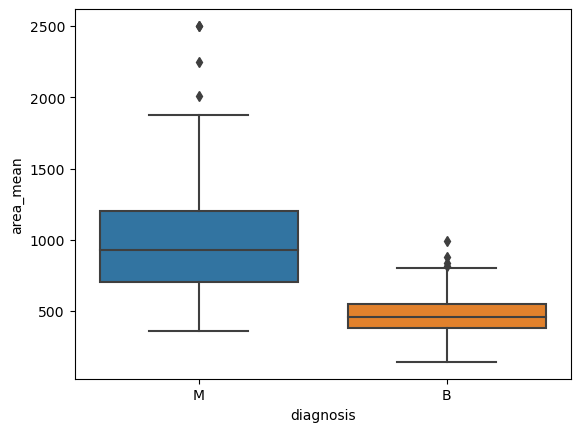

In [58]:
sns.boxplot(x = df["diagnosis"], y = df["area_mean"])
plt.show()